<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.105827,57.918903,93.590790,51.538028,410.320732,682.474281,228.241182,454.233099
1,0.0,1.0,68.056731,36.063583,98.317368,58.144651,172.710149,443.292482,178.814067,264.478415
2,0.0,2.0,27.799787,43.121794,90.596262,23.580374,-285.492632,-90.394416,286.848821,-377.243236
3,0.0,3.0,85.341234,61.968535,40.685266,94.661418,-416.000346,-123.343894,67.562332,-190.906225
4,0.0,4.0,21.584642,21.295647,53.133299,42.314610,54.705583,203.033781,161.735136,41.298645
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.103640,25.371076,46.213075,86.518070,5.142326,212.348187,219.652970,-7.304783
29996,999.0,26.0,66.126559,60.519545,48.702360,67.739554,-34.425215,218.662803,210.844228,7.818575
29997,999.0,27.0,37.921699,62.087554,62.798627,58.615276,-280.012199,-48.589043,-3.308416,-45.280627
29998,999.0,28.0,95.164930,53.944660,32.163171,70.442050,111.988482,373.703292,378.644880,-4.941588


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.105827,57.918903,93.590790,51.538028,410.320732,682.474281,228.241182,454.233099
1,0.0,1.0,68.056731,36.063583,98.317368,58.144651,172.710149,443.292482,178.814067,264.478415
2,0.0,2.0,27.799787,43.121794,90.596262,23.580374,-285.492632,-90.394416,286.848821,-377.243236
3,0.0,3.0,85.341234,61.968535,40.685266,94.661418,-416.000346,-123.343894,67.562332,-190.906225
4,0.0,4.0,21.584642,21.295647,53.133299,42.314610,54.705583,203.033781,161.735136,41.298645
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.103640,25.371076,46.213075,86.518070,5.142326,212.348187,219.652970,-7.304783
29996,999.0,26.0,66.126559,60.519545,48.702360,67.739554,-34.425215,218.662803,210.844228,7.818575
29997,999.0,27.0,37.921699,62.087554,62.798627,58.615276,-280.012199,-48.589043,-3.308416,-45.280627
29998,999.0,28.0,95.164930,53.944660,32.163171,70.442050,111.988482,373.703292,378.644880,-4.941588


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.105827,57.918903,93.590790,51.538028,410.320732,682.474281,228.241182,454.233099
1,0.0,1.0,68.056731,36.063583,98.317368,58.144651,172.710149,443.292482,178.814067,264.478415
2,0.0,2.0,27.799787,43.121794,90.596262,23.580374,-285.492632,-90.394416,286.848821,-377.243236
3,0.0,3.0,85.341234,61.968535,40.685266,94.661418,-416.000346,-123.343894,67.562332,-190.906225
4,0.0,4.0,21.584642,21.295647,53.133299,42.314610,54.705583,203.033781,161.735136,41.298645
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.103640,25.371076,46.213075,86.518070,5.142326,212.348187,219.652970,-7.304783
29996,999.0,26.0,66.126559,60.519545,48.702360,67.739554,-34.425215,218.662803,210.844228,7.818575
29997,999.0,27.0,37.921699,62.087554,62.798627,58.615276,-280.012199,-48.589043,-3.308416,-45.280627
29998,999.0,28.0,95.164930,53.944660,32.163171,70.442050,111.988482,373.703292,378.644880,-4.941588


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

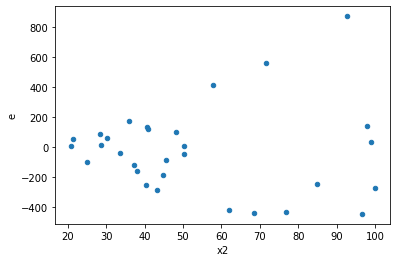

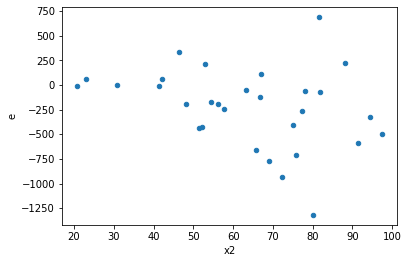

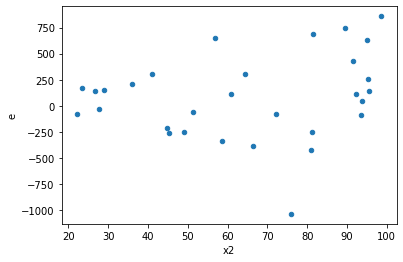

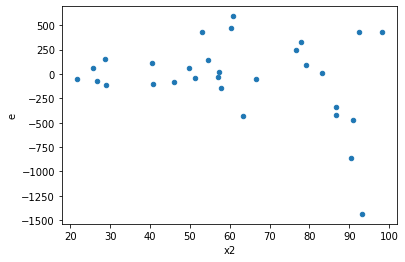

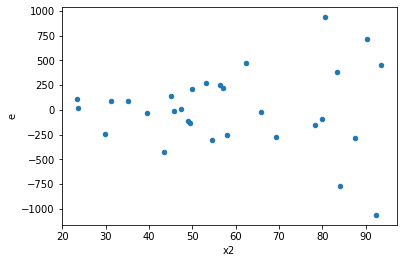

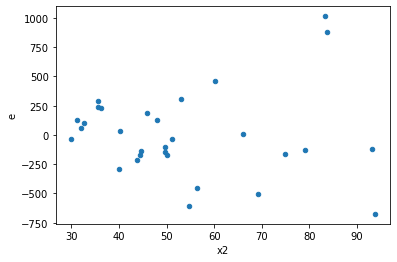

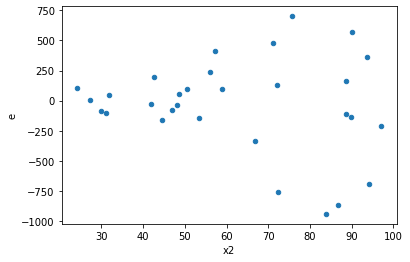

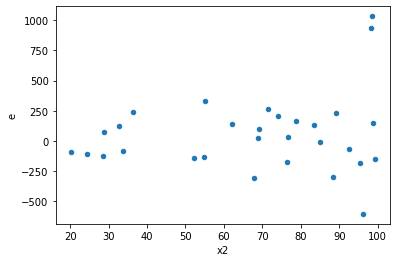

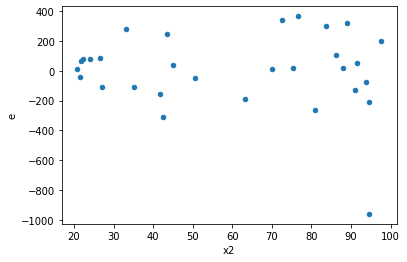

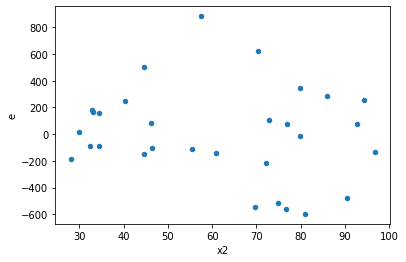

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,80370.9543237008,1340789.818635917,10046.3692904626,167598.72732948963,16.6825170849132,0.0006233375983979439,0.999688331200801,0.00031166879919897195,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,303362.4643094897,1136140.223175933,37920.30803868621,142017.5278969916,3.745157548617634,0.07976187452676453,0.9601190627366177,0.039880937263382266,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,377989.8244494185,1046936.621052891,47248.728056177315,130867.07763161138,2.769748160755023,0.17102804798283655,0.9144859760085817,0.08551402399141828,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,98356.53337447459,1465812.754179064,12294.566671809323,183226.594272383,14.903054264816847,0.0009377378968280503,0.999531131051586,0.00046886894841402516,Reject001=0 : Heteroscedasticity
9.0,8.0,8.0,585126.0332256611,669986.9823591767,73140.75415320764,83748.37279489709,1.145030205998009,0.8527725845473677,0.5736137077263161,0.42638629227368385,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,1135137.6109129959,1713434.733529521,141892.20136412448,214179.34169119011,1.5094511159324535,0.5737638512519032,0.7131180743740484,0.2868819256259516,Reject001=1 : Homoscedasticity
12.0,8.0,8.0,889255.4209421918,1289654.0134845425,111156.92761777398,161206.7516855678,1.450262751412993,0.6113239960281733,0.6943380019859133,0.30566199801408667,Reject001=1 : Homoscedasticity
17.0,8.0,8.0,1326970.8274895845,1339639.3666025116,165871.35343619806,167454.92082531395,1.0095469612824073,0.9896078534814179,0.5051960732592911,0.49480392674070894,Reject001=1 : Homoscedasticity
21.0,8.0,8.0,521968.7808329819,1015736.6139445368,65246.09760412274,126967.0767430671,1.9459719646902585,0.36563433212463936,0.8171828339376803,0.18281716606231968,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,80370.9543237008,1340789.818635917,10046.3692904626,167598.72732948963,16.6825170849132,0.0006233375983979439,Reject001=0 : Heteroscedasticity
1.0,8.0,8.0,1336450.9848138364,490263.0872849939,167056.37310172955,61282.88591062424,0.36683955704764293,0.1775593570763563,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,933904.2191384556,710608.8029870925,116738.02739230695,88826.10037338657,0.7609011592673205,0.7083925177006815,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1502082.8062721153,791271.648307163,187760.35078401442,98908.95603839538,0.5267829742828555,0.3834618949381692,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,303362.4643094897,1136140.223175933,37920.30803868621,142017.5278969916,3.745157548617634,0.07976187452676453,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,377989.8244494185,1046936.621052891,47248.728056177315,130867.07763161138,2.769748160755023,0.17102804798283655,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,1861761.4435490584,307928.74358328513,232720.1804436323,38491.09294791064,0.16539645541068004,0.019823745825556065,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,98356.53337447459,1465812.754179064,12294.566671809323,183226.594272383,14.903054264816847,0.0009377378968280503,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,755211.6780455961,113140.16807207347,94401.45975569951,14142.521009009184,0.1498125245690952,0.014524663384582592,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      826
Reject001=0 : Heteroscedasticity    174
Name: Result_test, dtype: int64